<a href="https://colab.research.google.com/github/lakshya324/MLCOE-Task-1-EDA/blob/main/Task1_1_Exploratory_Data_Analysis(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLCOE Task 1.1 - Exploratory Data Analysis(EDA)
$\textrm{Lakshya Sharma} $

<details><summary>what is EDA?</summary>

<b>Exploratory data analysis (EDA)</b> is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.
</details>

## Installing Libraries

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

## Importing DataSet

[Dataset link](https://grouplens.org/datasets/movielens/)

In [ ]:
imported_dataset=pd.read_csv('ratings.csv')
imported_dataset

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [ ]:
dataset=np.array(imported_dataset,dtype='int')[:,:-1]
dataset

array([[     1,      1,      4],
       [     1,      3,      4],
       [     1,      6,      4],
       ...,
       [   610, 168250,      5],
       [   610, 168252,      5],
       [   610, 170875,      3]])

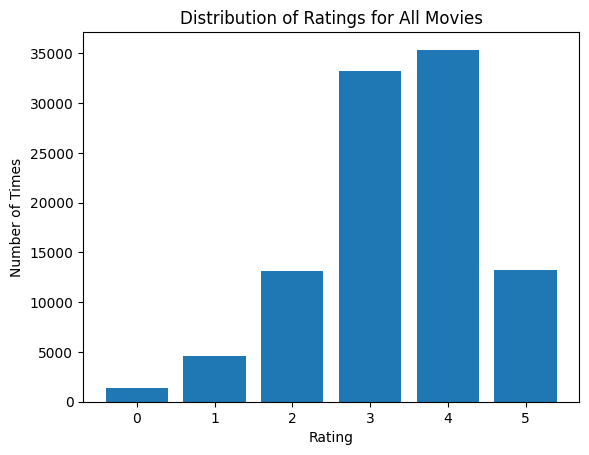

In [ ]:
plt.bar(range(6), np.bincount(dataset[:,2]))
plt.title('Distribution of Ratings for All Movies')
plt.xlabel('Rating')
plt.ylabel('Number of Times')
plt.show()

## Data Preprocessing

### Converting data into Matrix
lines/rows -> User <br>
column -> Movies <br>
{if User didn't give that movie a rating then it will be zero}

In [ ]:
#Getting the Maximum/Total number of Users and Movies
total_user=int(dataset[-1,0])
total_movies=int(max(dataset[:,1]))

In [ ]:
#Creating Matrix Function
#   lines/rows -> User (let, max users = n)
#   column -> Movies (let, max movies = m)
#   {if User didn't give that movie a rating then it will be zero}
#           __                                       __
# User 1-> | 2   3   4   5    0   1  ... upto m movies |
# User 2-> | 1   0   0   2    4   3  ... upto m movies |
#  ...
# User n-> | 4   2   1   0    0   4  ... upto m movies |
#           __                                       __

def convert(data:np.array)->list:
  array=[]
  for user in range(1,total_user+1):
    reviewed_movies=data[:,1][data[:,0]==user] #contains all movies indexs which is reviewed by this user
    user_ratings=data[:,2][data[:,0]==user] #contains all movies reviews which are given by this user
    ratings=np.zeros(total_movies)
    ratings[reviewed_movies-1] =user_ratings
    #accessing reviewed movies index and give its value.
    #{movies number start from 1 but rating start from 0.hence, doing reviewed_movies-1}
    array.append(list(ratings))

  return np.array(array,dtype='int')

In [ ]:
matrix=convert(dataset)

In [ ]:
matrix

array([[4, 0, 4, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 2, 2, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       [5, 0, 0, ..., 0, 0, 0]])

## Finding Movie 1 Analysis

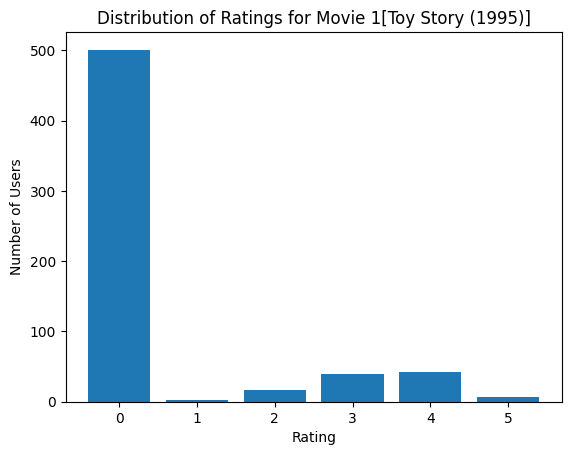

In [ ]:
plt.bar(range(6), np.bincount(matrix[:,1]))
plt.title('Distribution of Ratings for Movie 1[Toy Story (1995)]')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()

In [ ]:
rated_movie=0
unwatched_movie=0
highest_rating={0:[0,0],1:[0,0],2:[0,0],3:[0,0],4:[0,0],5:[0,0]}
for i in range(total_movies):
  rating=list(np.bincount(matrix[:,i]))
  if len(rating)<6:
    # print(f"{i+1} Movie : No one watch it")
    unwatched_movie+=1
  else:
    print(f"{i+1} Movie : {rating}")
    rated_movie+=1
    for j in range(6):
      if rating[j]>highest_rating[j][1]:
        highest_rating[j]=[i+1,rating[j]]

1 Movie : [396, 1, 14, 52, 100, 47]
2 Movie : [501, 3, 17, 39, 43, 7]
3 Movie : [559, 4, 4, 25, 12, 6]
5 Movie : [562, 2, 8, 26, 9, 3]
6 Movie : [508, 1, 2, 30, 45, 24]
7 Movie : [556, 5, 5, 24, 18, 2]
8 Movie : [602, 1, 1, 5, 0, 1]
9 Movie : [594, 1, 3, 8, 2, 2]
10 Movie : [479, 2, 11, 59, 49, 10]
11 Movie : [540, 2, 8, 17, 32, 11]
12 Movie : [591, 7, 2, 7, 2, 1]
14 Movie : [592, 0, 0, 6, 9, 3]
15 Movie : [597, 2, 3, 3, 4, 1]
16 Movie : [528, 2, 5, 18, 43, 14]
17 Movie : [545, 3, 1, 21, 21, 19]
18 Movie : [590, 0, 2, 7, 7, 4]
19 Movie : [522, 13, 29, 28, 15, 3]
21 Movie : [521, 2, 10, 32, 36, 9]
22 Movie : [574, 1, 4, 23, 5, 3]
23 Movie : [594, 2, 2, 8, 2, 2]
24 Movie : [582, 1, 9, 9, 6, 3]
25 Movie : [534, 4, 9, 20, 26, 17]
27 Movie : [601, 0, 3, 3, 1, 2]
28 Movie : [599, 0, 1, 2, 5, 3]
29 Movie : [572, 0, 3, 8, 19, 8]
31 Movie : [573, 2, 6, 16, 11, 2]
32 Movie : [433, 1, 5, 53, 73, 45]
34 Movie : [482, 5, 19, 29, 48, 27]
36 Movie : [544, 2, 1, 17, 33, 13]
39 Movie : [507, 8, 8, 47, 

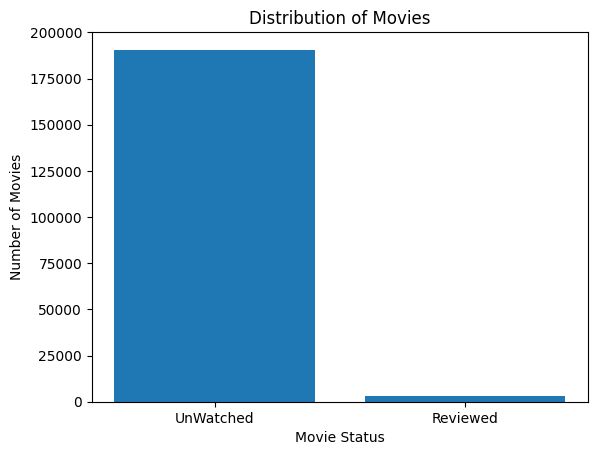

In [ ]:
plt.bar(["UnWatched","Reviewed"],[unwatched_movie,rated_movie])
plt.title('Distribution of Movies')
plt.xlabel('Movie Status')
plt.ylabel('Number of Movies')
plt.show()

In [ ]:
#Importing Movies
imported_movies=pd.read_csv('movies.csv')
imported_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [ ]:
movies=imported_movies.iloc[:,:-1].values
movies

array([[1, 'Toy Story (1995)'],
       [2, 'Jumanji (1995)'],
       [3, 'Grumpier Old Men (1995)'],
       ...,
       [193585, 'Flint (2017)'],
       [193587, 'Bungo Stray Dogs: Dead Apple (2018)'],
       [193609, 'Andrew Dice Clay: Dice Rules (1991)']], dtype=object)

In [ ]:
for i in highest_rating:
  index=highest_rating[i][0]
  movie_name=movies[movies[:, 0] == index,1]
  # print(str(movie_name[0]),highest_rating[i])
  highest_rating[i].append(str(movie_name[0]))

In [ ]:
highest_rating

{0: [148, 609, 'Awfully Big Adventure, An (1995)'],
 1: [344, 15, 'Ace Ventura: Pet Detective (1994)'],
 2: [344, 32, 'Ace Ventura: Pet Detective (1994)'],
 3: [592, 105, 'Batman (1989)'],
 4: [356, 133, 'Forrest Gump (1994)'],
 5: [318, 153, 'Shawshank Redemption, The (1994)']}

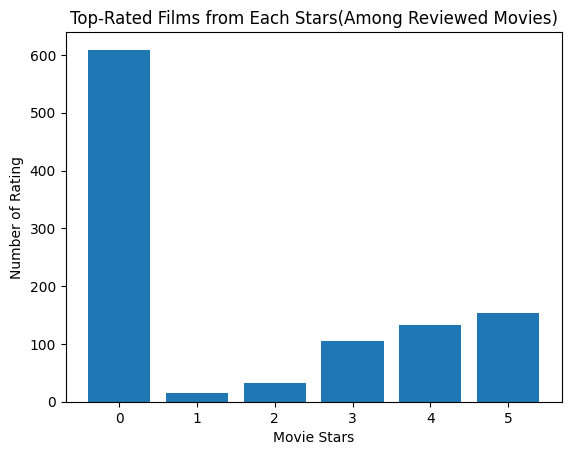

In [ ]:
# plt.bar([f'{highest_rating[i][2]} {i}Stars' for i in range(6)],[highest_rating[i][1] for i in range(6)])
plt.bar(range(6),[highest_rating[i][1] for i in range(6)])
plt.title('Top-Rated Films from Each Stars(Among Reviewed Movies)')
plt.xlabel('Movie Stars')
plt.ylabel('Number of Rating')
plt.show()

Best Regards,<br>
<b>~Lakshya Sharma</b> <br>
(20/10/2023 1:56 AM)